Importing libraries

#Importing Dataset

In [1]:
# Import the necessary libraries
import pandas as pd  # Import the pandas library and give it the alias 'pd'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the data from the Excel file
data = pd.read_excel("/content/ecom customer_data.xlsx")  # Now you can use 'pd' to refer to pandas
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
#Check the duplicates
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [ ]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df.isna().sum().sum()

0

In [ ]:
#Data Visualization
df.Gender.value_counts()


Gender
F    24778
M     5222
Name: count, dtype: int64

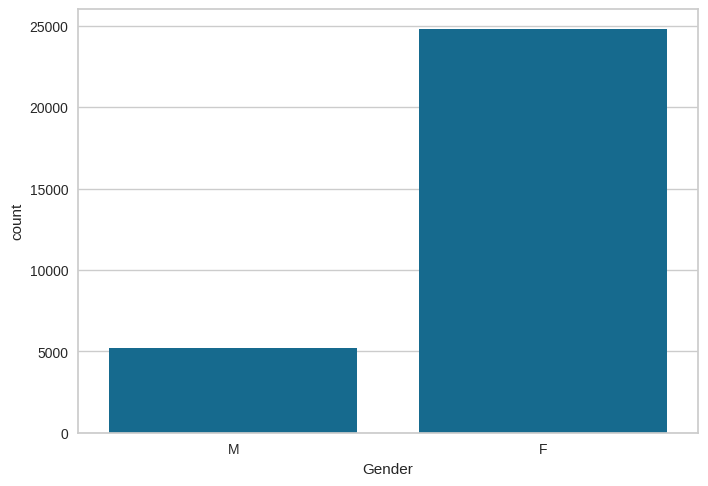

In [ ]:
sns.countplot(data=df,x='Gender')
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

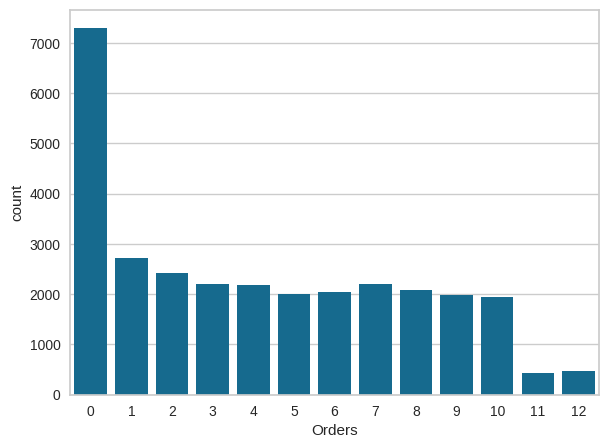

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders')

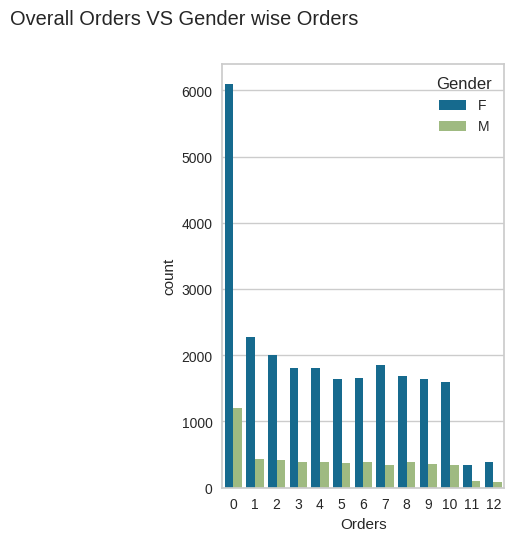

In [ ]:
#Order count by each number
plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()


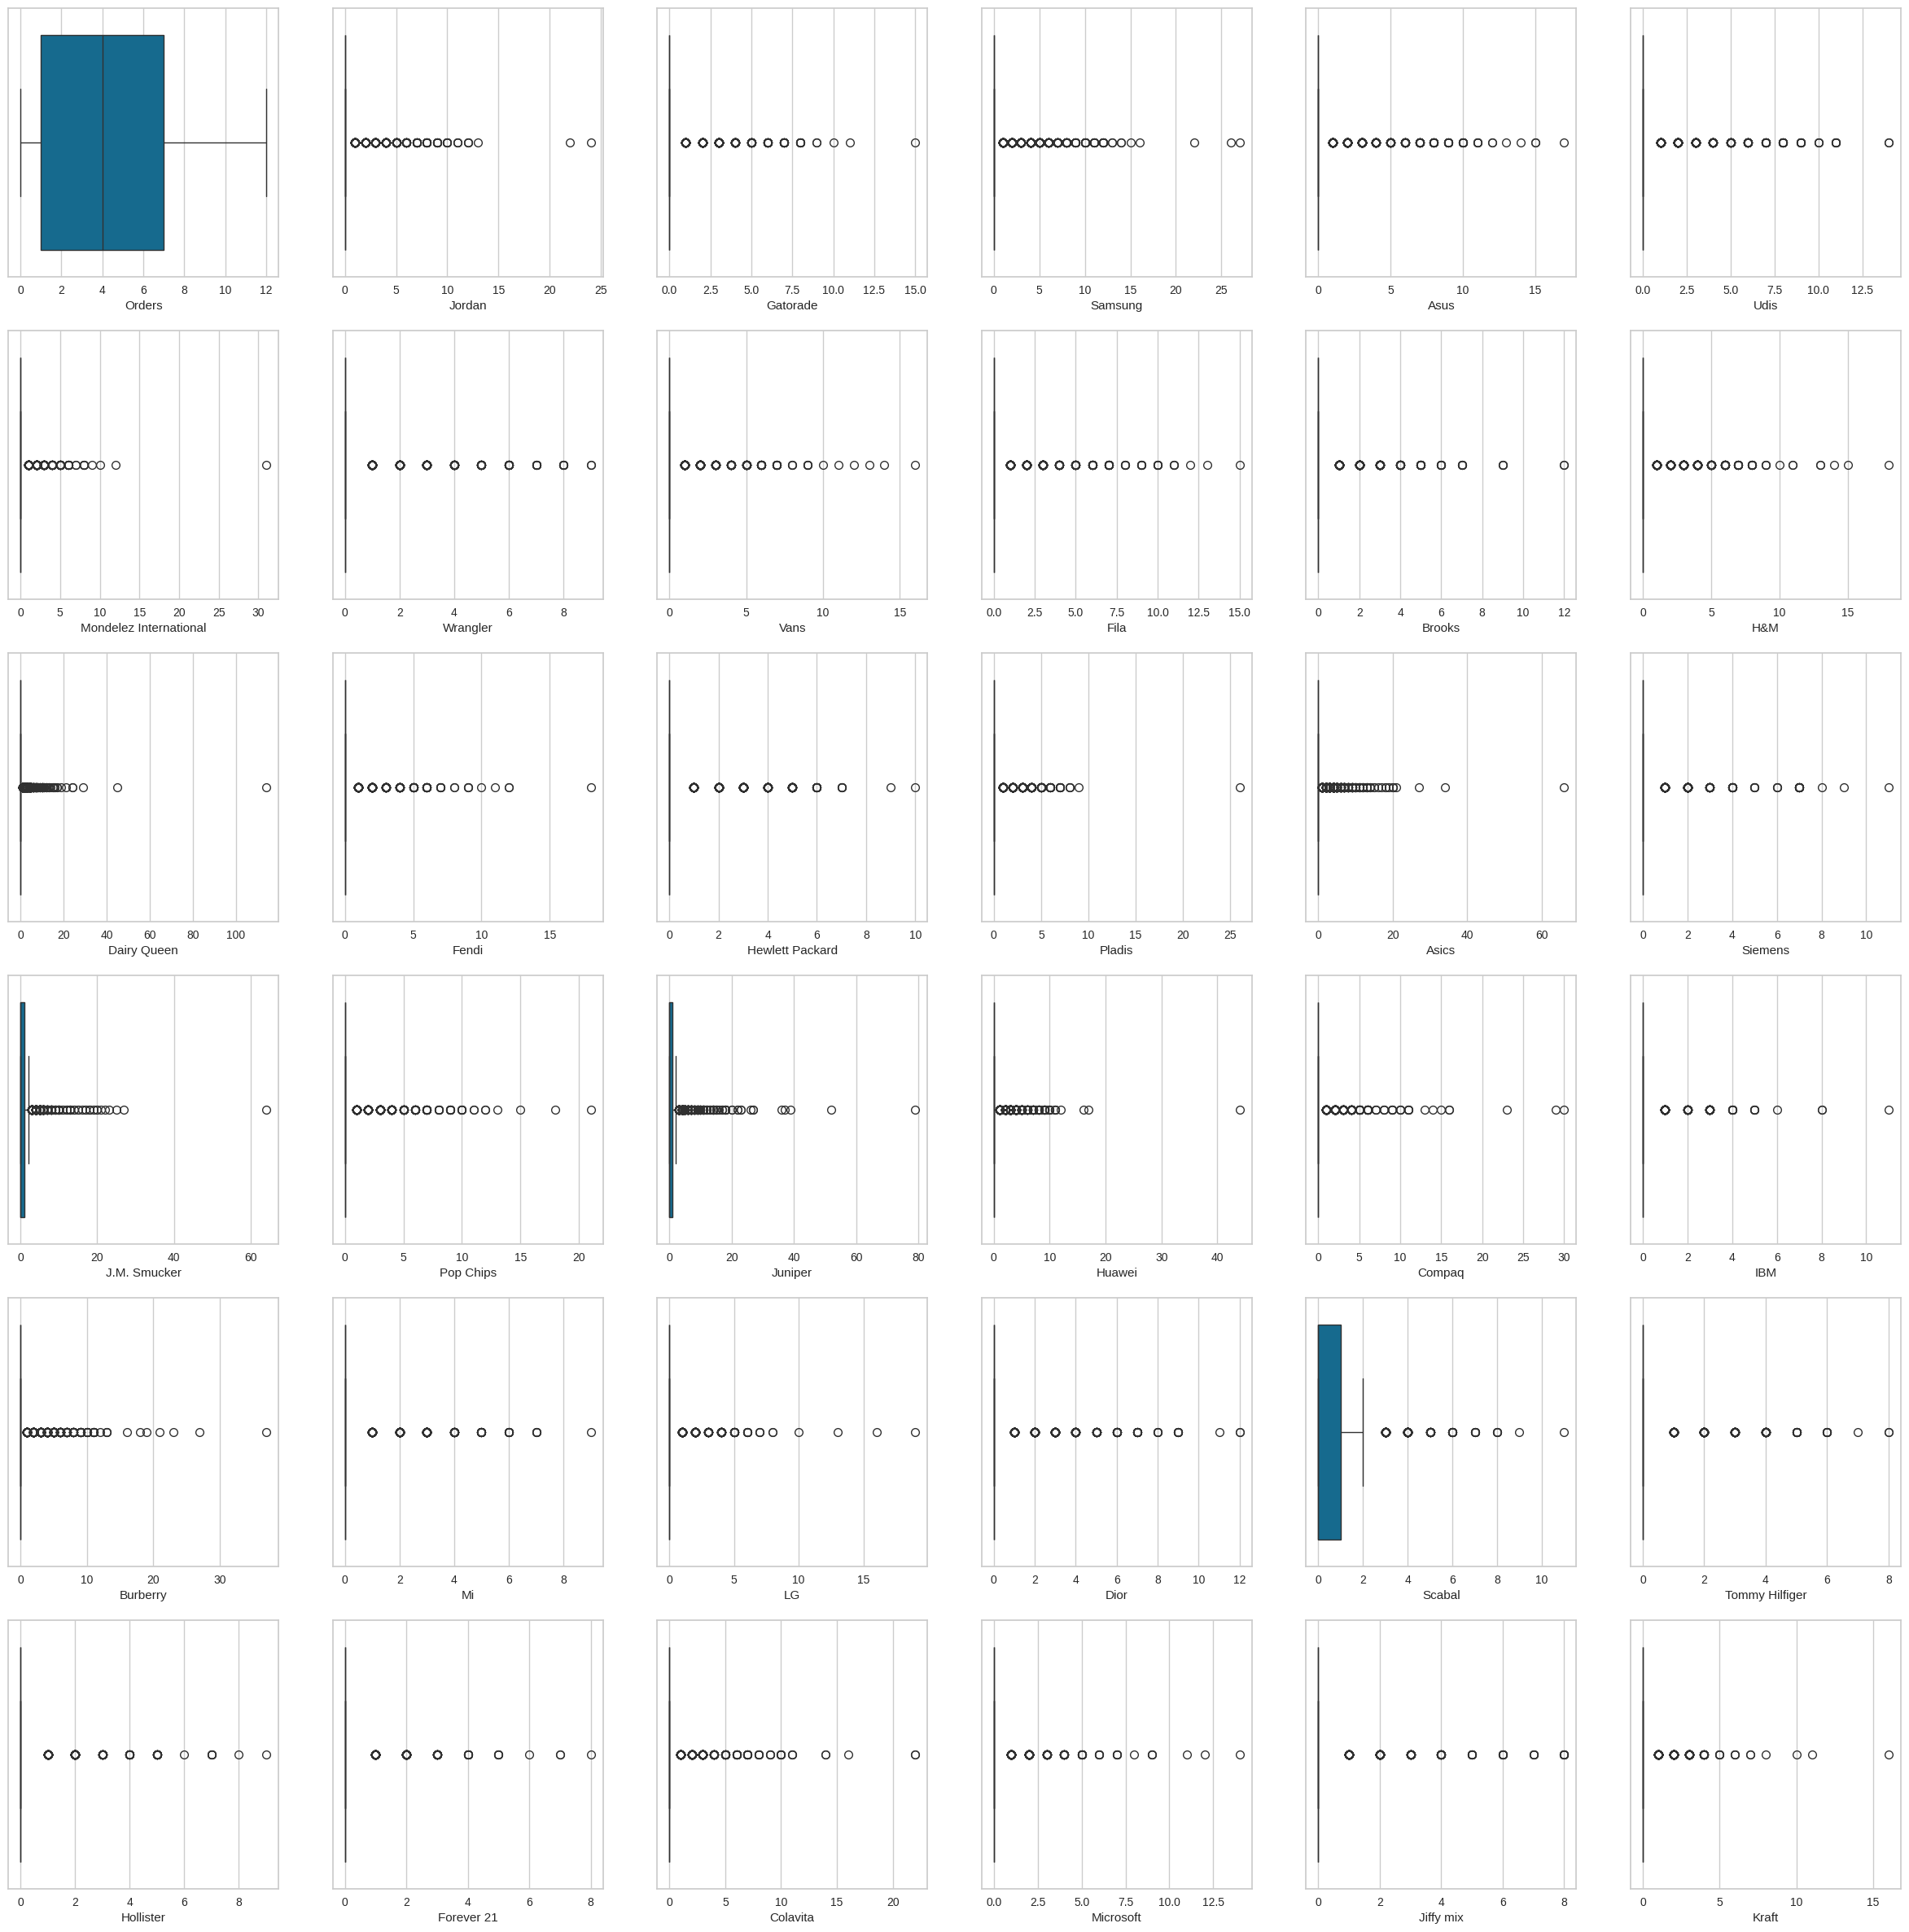

In [ ]:
#orders and searches for brands
col=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df,x=df[col])
dist_list(col)

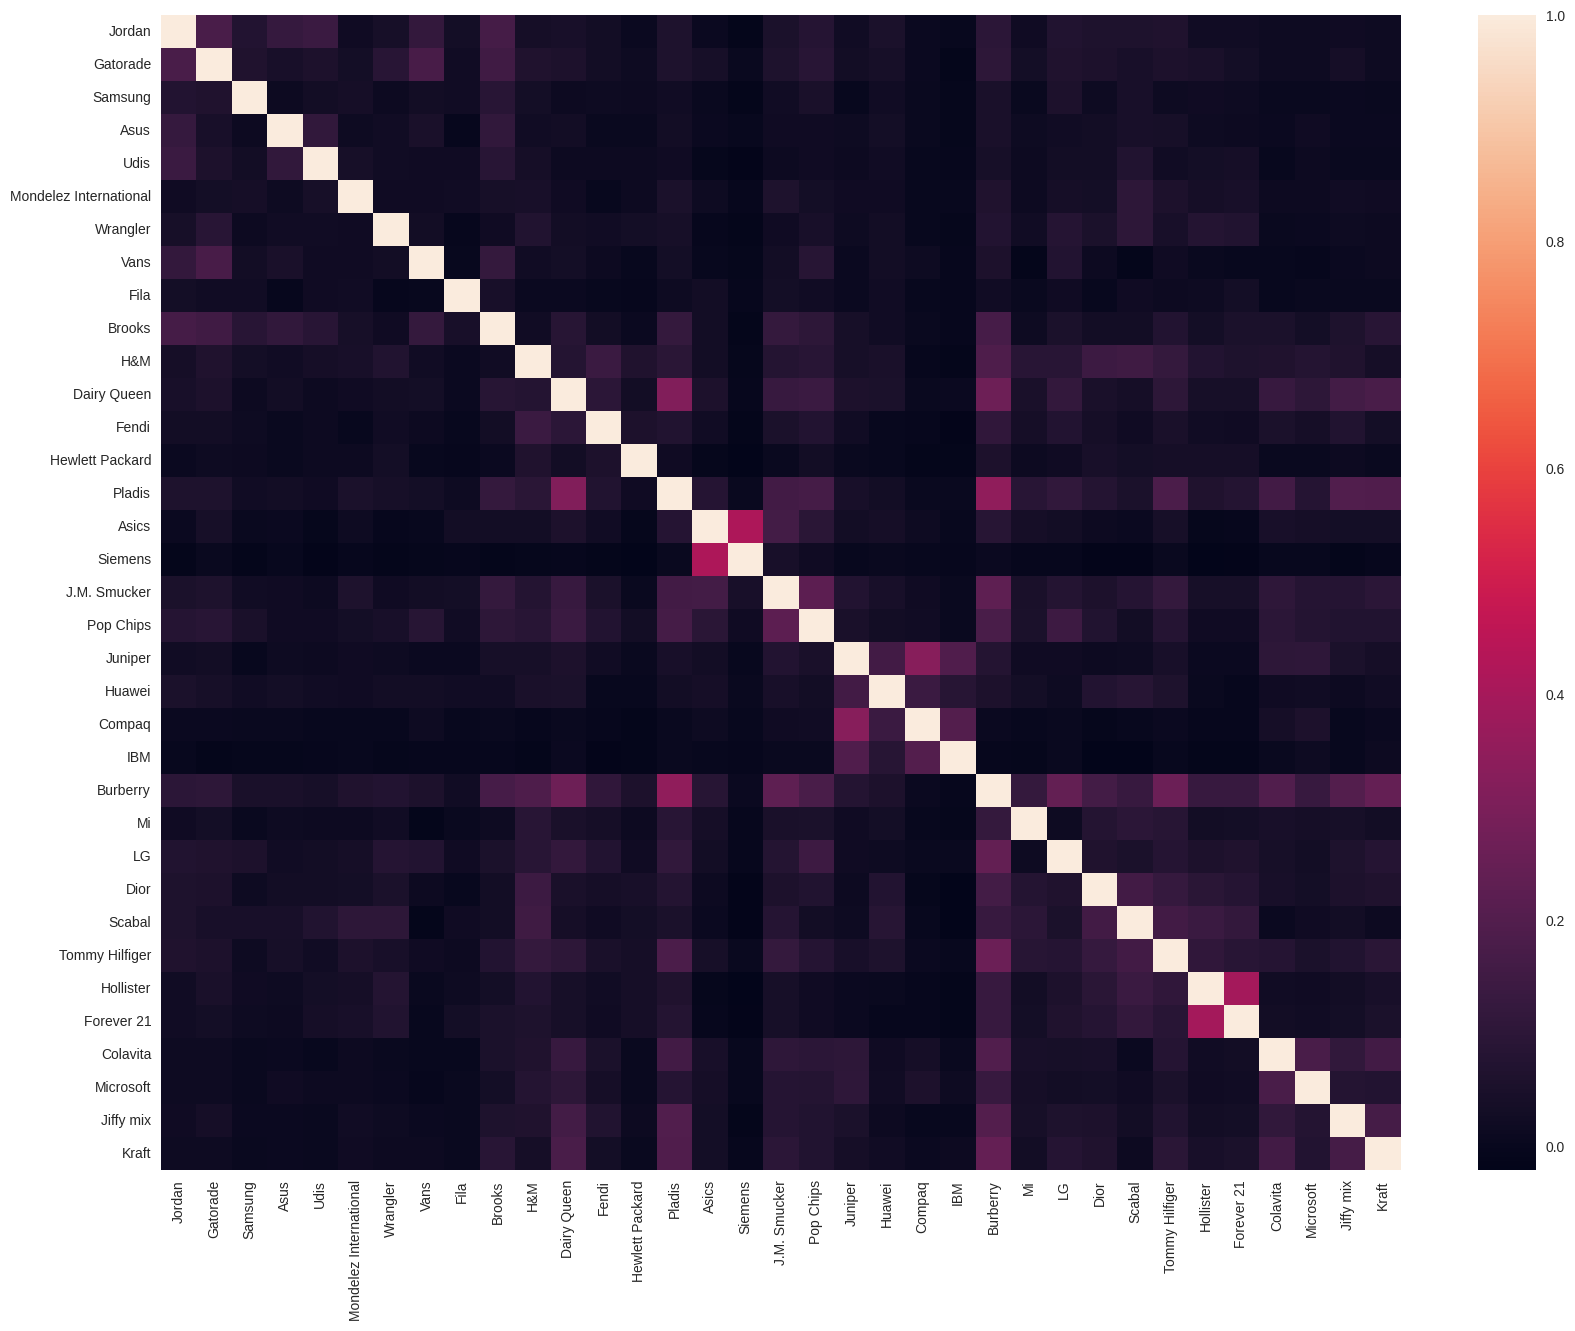

In [ ]:
#heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

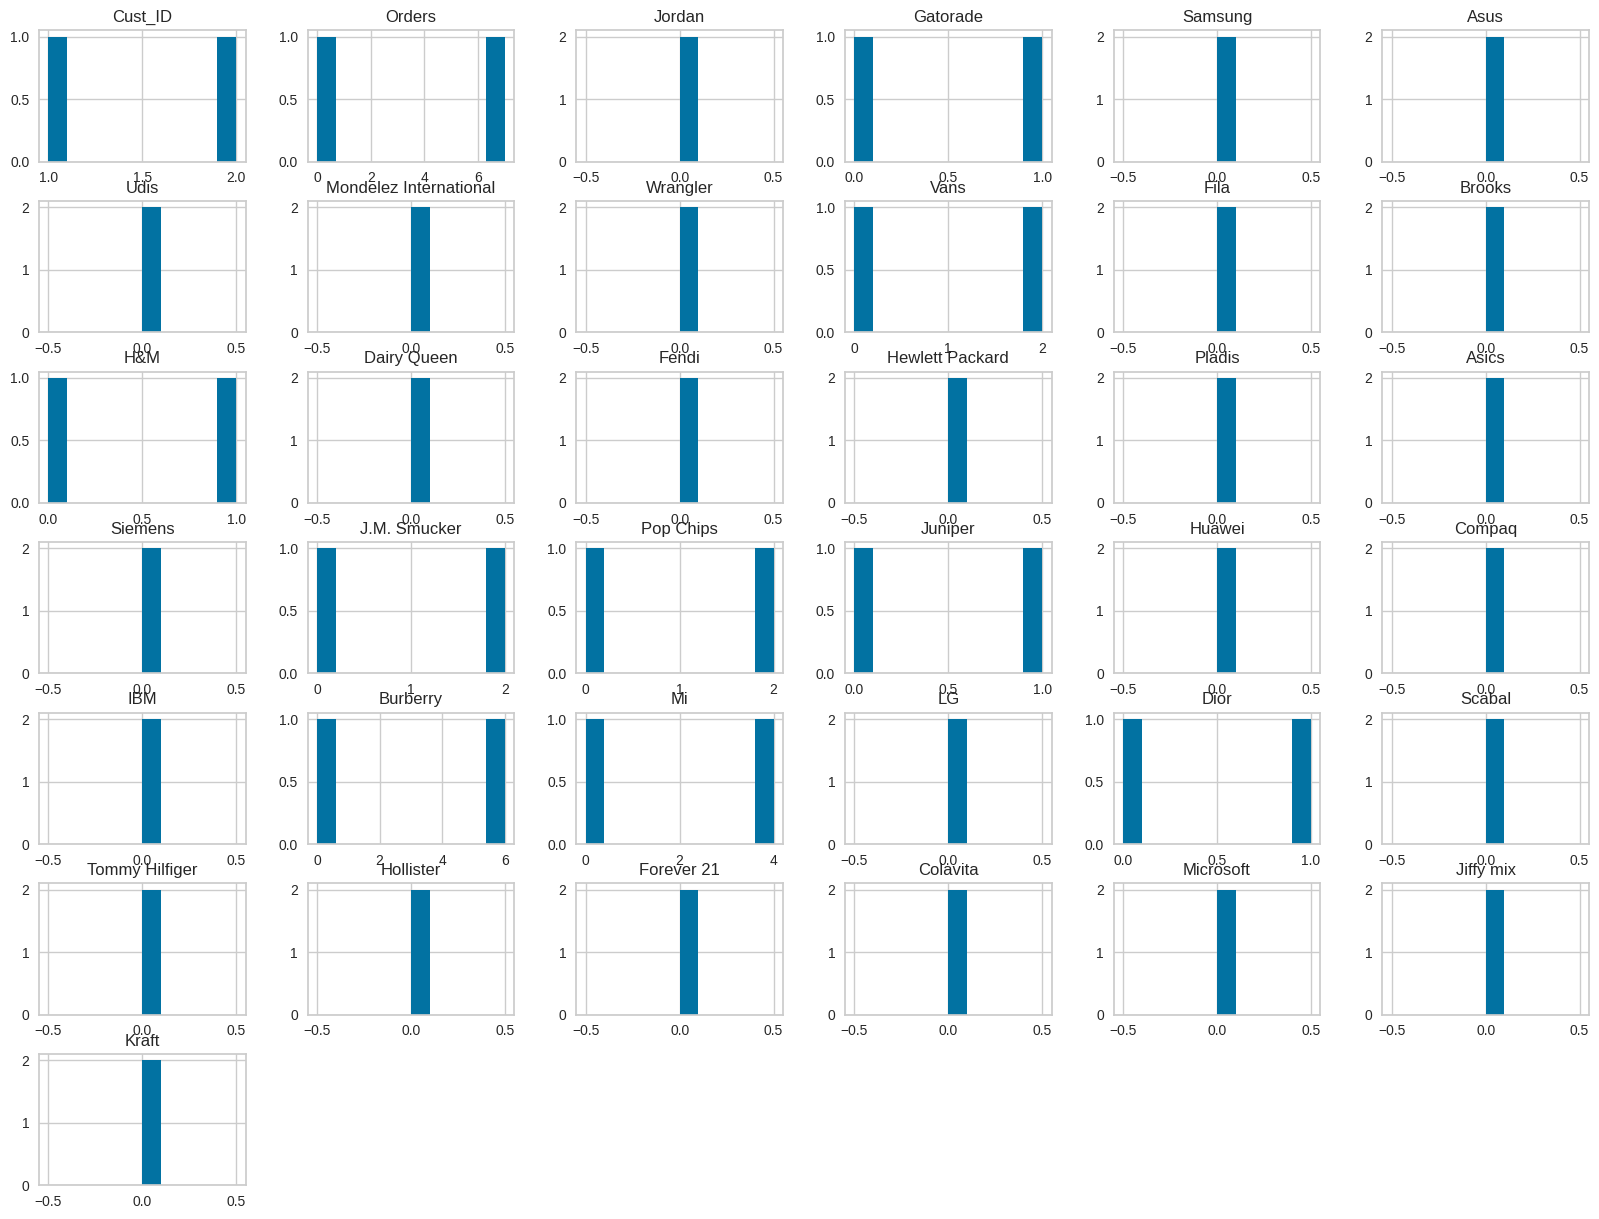

In [ ]:
df.iloc[:2,:].hist(figsize=(20,15))
plt.show()

In [ ]:
new_df = df.copy()
new_df['total search'] = new_df.iloc[1:, 2:].sum(axis=1)

In [ ]:
new_df.sort_values(by='total search',ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,162.0
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,138.0
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,128.0
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109.0
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,2668,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
22494,22495,F,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
22499,22500,M,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
18257,18258,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


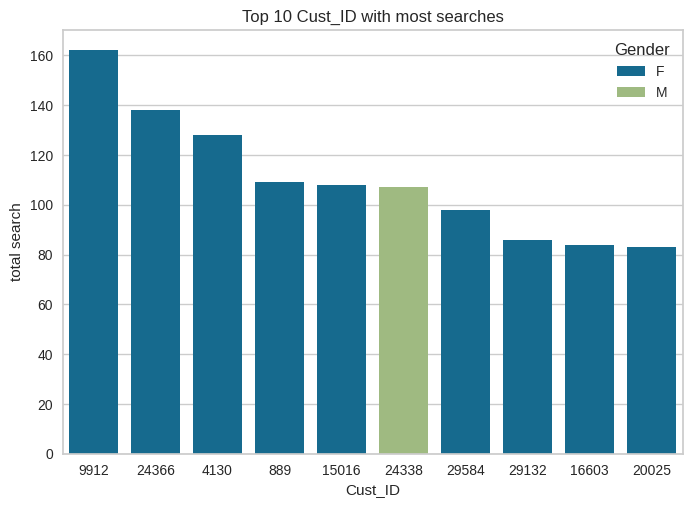

In [ ]:
plt_data = new_df.sort_values('total search', ascending=False)[['Cust_ID', 'Gender', 'total search']].head(10)
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='total search',
            hue='Gender',
            order=plt_data.sort_values('total search', ascending=False).Cust_ID)
plt.title("Top 10 Cust_ID with most searches")
plt.show()

In [ ]:
x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [ ]:
scale=MinMaxScaler()
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

Elbow Method to get Optimal K value


In [ ]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Method')

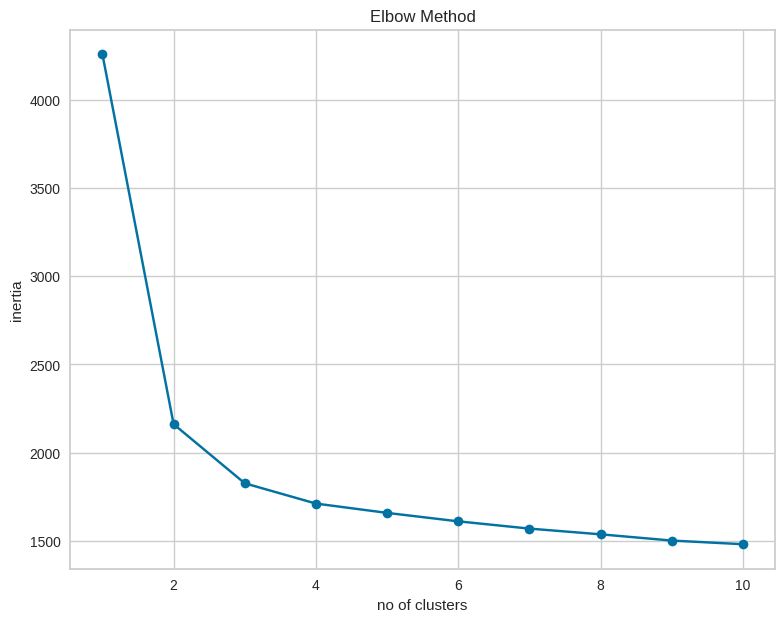

In [ ]:
#ELBOW GRAPH
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1, 11), inertia , 'bo-')
plt.xlabel('no of clusters'),plt.ylabel('inertia')
plt.title('Elbow Method')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

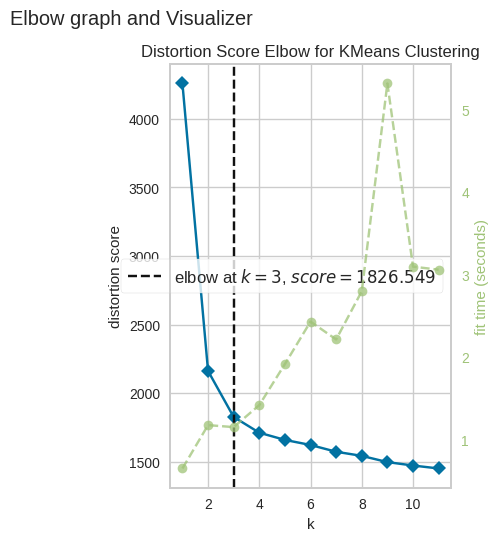

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#kelbow visualizer
plt.subplot(1,2,2)
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,12))
visualizer.fit(features)
plt.suptitle('Elbow graph and Visualizer')
visualizer.poof()
visualizer.show()



Silhoutte score for each K value


In [ ]:
silhoutte_avg=[]
for i in range(2,11):
  #initialize k means cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #silhoutte score
  silhoutte_avg.append(silhouette_score(features,cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

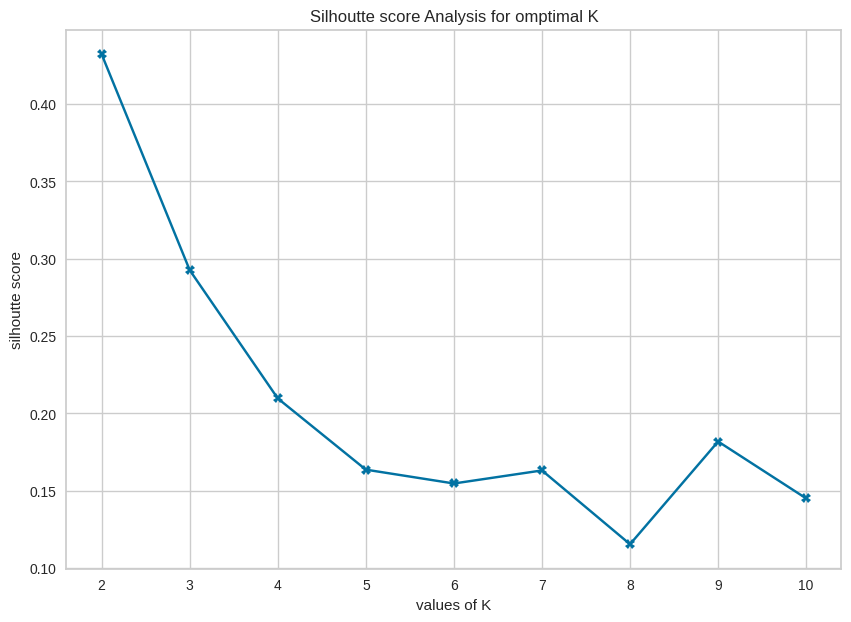

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(2,11),silhoutte_avg,'bX-')
plt.xlabel('values of K'),plt.ylabel('silhoutte score')
plt.title('Silhoutte score Analysis for omptimal K')
plt.show()

Kmeans Model
here we'll take K value as 3 as per Elbow Method

In [ ]:
model=KMeans(n_clusters=3)
model=model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_km=model.predict(features)
centers=model.cluster_centers_

In [ ]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv('Cluster_data', index=False)

In [ ]:
df['Cluster'].value_counts()

Cluster
2    12432
1     9128
0     8440
Name: count, dtype: int64

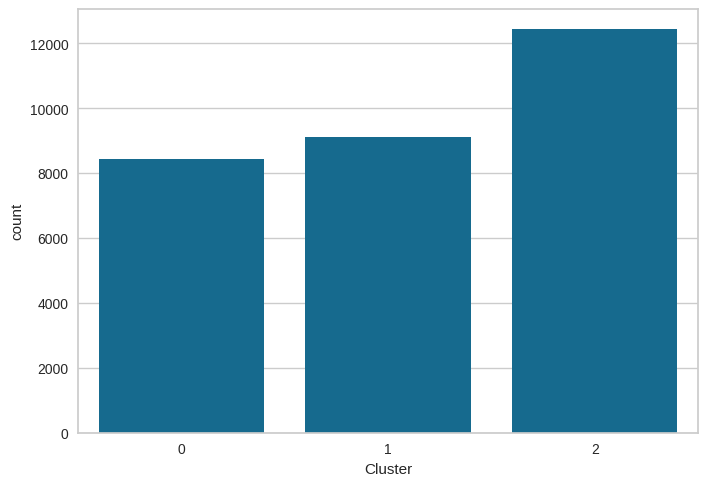

In [ ]:
sns.countplot(data=df,x='Cluster')
plt.show()

Analyze the Clusters

In [ ]:
c_df=pd.read_csv('/content/Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [ ]:
c_df['Total Search']=c_df.iloc[:,3:38].sum(axis=1)


Analyze the cluster 1


In [ ]:
cl_0=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==1')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,116501910,65606,1982,1678,1780,1565,1308,1145,...,2241,3440,1322,605,465,1465,918,713,510,55251
3,1,M,22723520,14279,526,817,341,14,51,151,...,284,97,155,90,42,326,176,123,98,9322


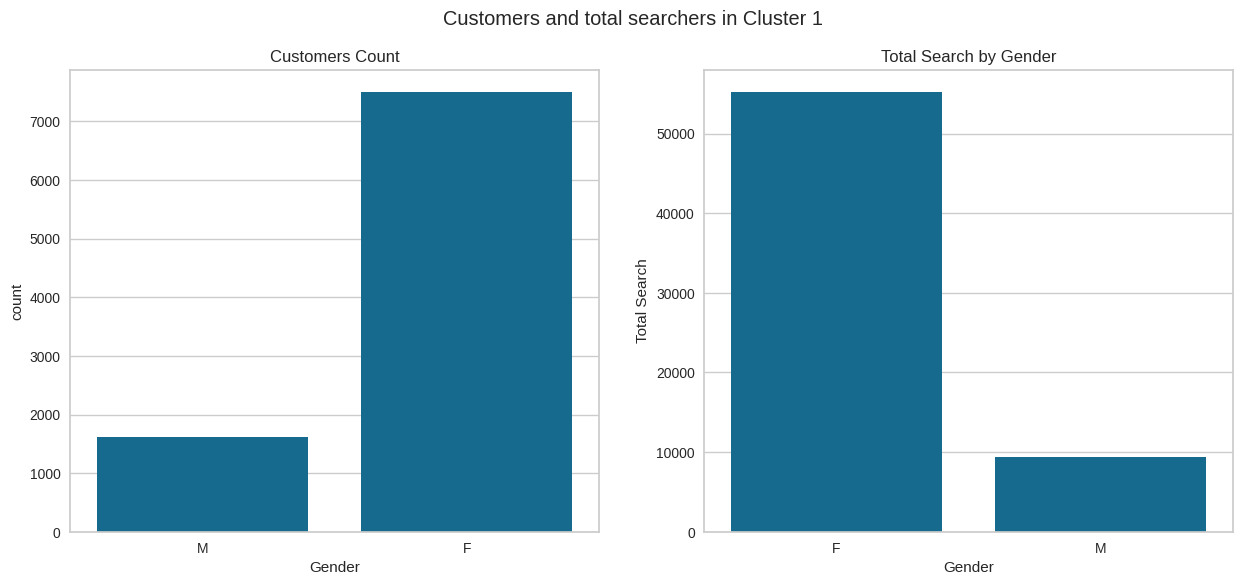

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==1'),x='Gender')
plt.title('Customers Count')
plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Search by Gender')
plt.suptitle('Customers and total searchers in Cluster 1')
plt.show()

Analyzing the cluster 2


In [ ]:
cl_2=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,154699357,6269,2470,1947,2086,1813,1632,1480,...,3041,4194,1807,847,654,1960,1153,870,776,70690
5,2,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


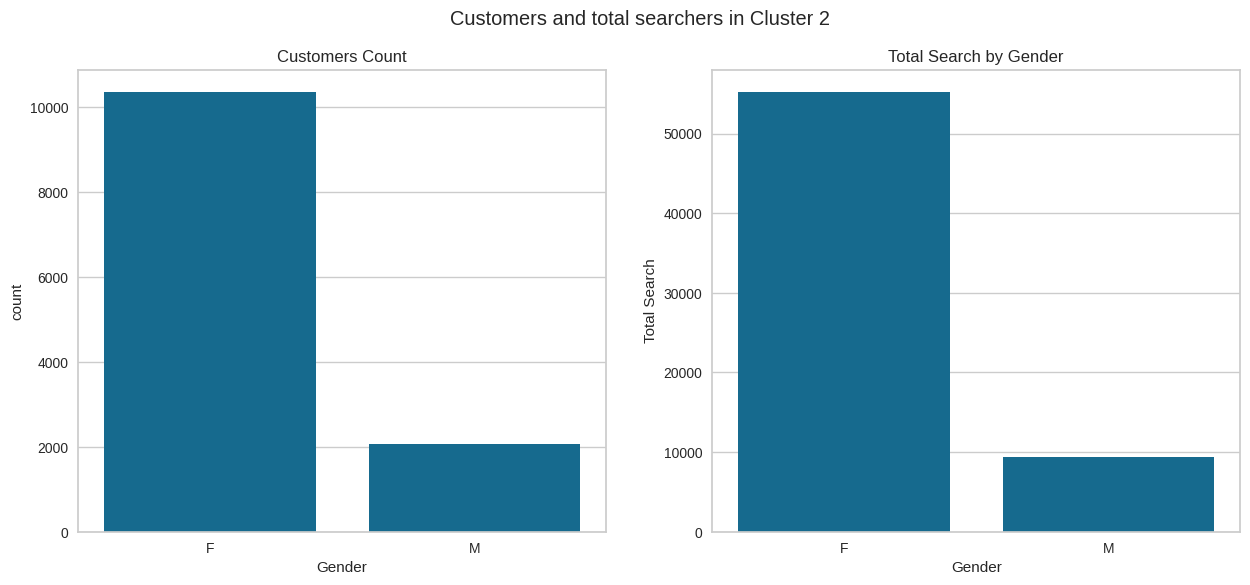

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==2'),x='Gender')
plt.title('Customers Count')
plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Search by Gender')
plt.suptitle('Customers and total searchers in Cluster 2')
plt.show()

Overall Analysis

In [ ]:
final_df=c_df.groupby(['Cluster'], as_index=False).sum()
final_df

,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,127844829,FFFFFFFFFFMMFMFMFFFFFFFFFFFFMFFFMFFFFFFFFFMFFF...,37649,2444,2351,2046,1436,1240,1255,...,2285,3196,1313,705,504,1629,1058,775,601,60093
1,1,139225430,MMFMFFFFMFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFF...,79885,2508,2495,2121,1579,1359,1296,...,2525,3537,1477,695,507,1791,1094,836,608,64573
2,2,182944741,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFMFMMMFFFFFFF...,7560,3071,2724,2521,1825,1707,1642,...,3324,4369,1979,930,709,2346,1339,1030,918,81477


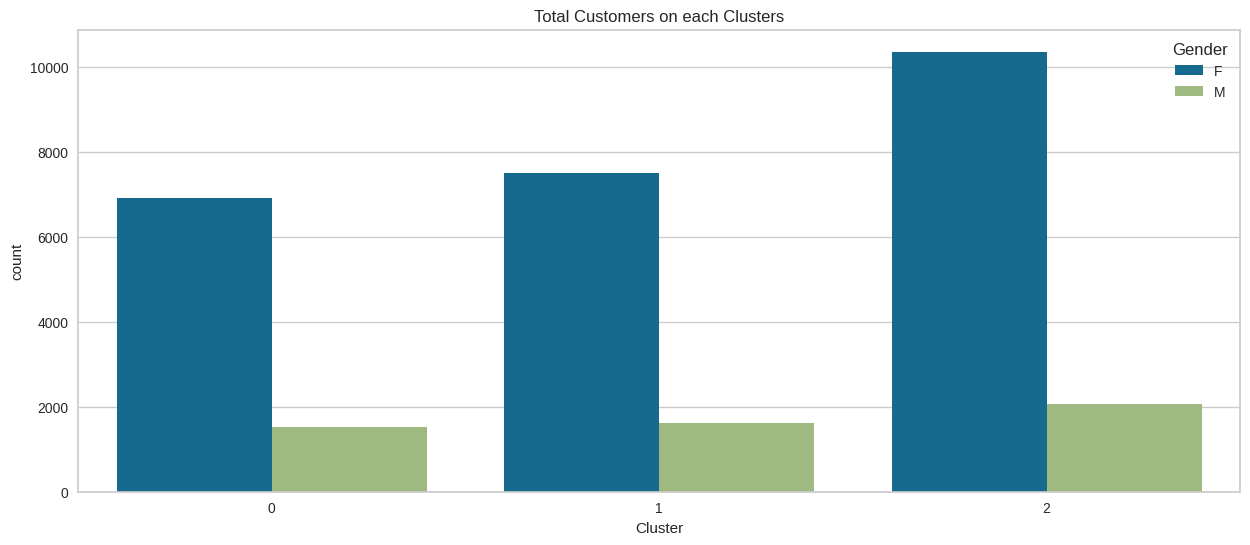

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customers on each Clusters')
plt.show()


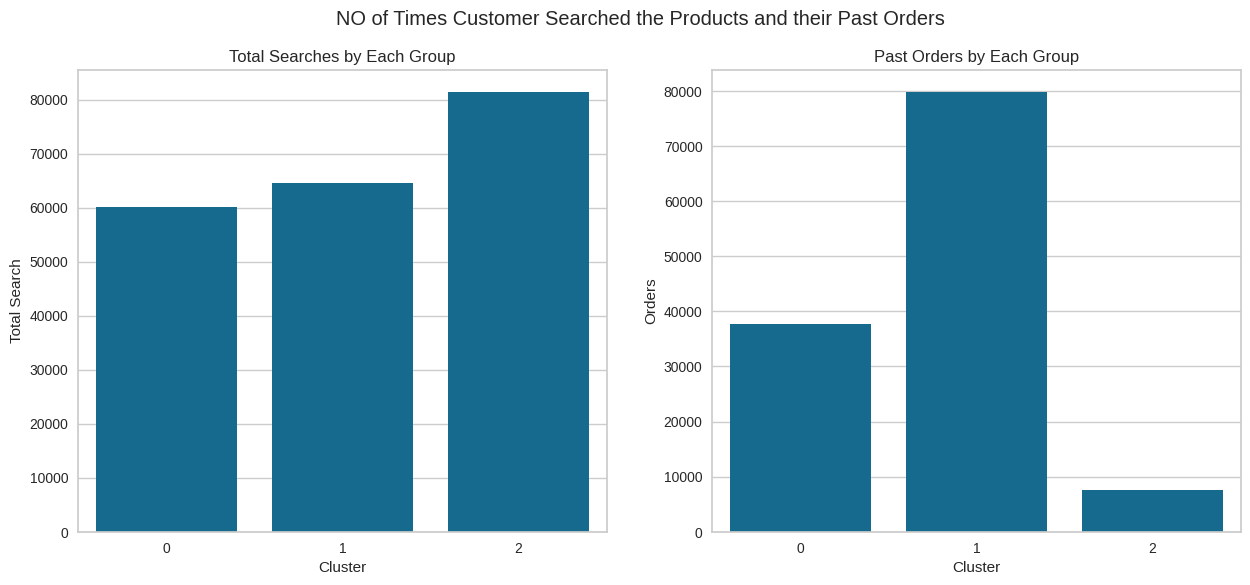

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Searches by Each Group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past Orders by Each Group')
plt.suptitle('NO of Times Customer Searched the Products and their Past Orders')
plt.show()